##Data Preprocessing

In [161]:
import pandas as pd
df = pd.read_csv("/content/Dehli_temp.csv", index_col="Date")

In [162]:
df.apply(pd.isnull).sum()/df.shape[0]

_id         0.000000
Rain        0.000000
Temp Max    0.000000
Temp Min    0.000039
dtype: float64

In [163]:
core_df = df[["Rain", "Temp Max", "Temp Min"]].copy()
core_df.columns = ["RAIN", "TMAX", "TMIN"]

core_df

,RAIN,TMAX,TMIN
Date,,,
1951-01-01T00:00:00,0.0,20.139999,3.680000
1951-01-02T00:00:00,0.0,21.680000,3.600000
1951-01-03T00:00:00,0.0,21.280001,3.510000
1951-01-04T00:00:00,0.0,21.610001,4.090000
1951-01-05T00:00:00,0.0,21.389999,5.100000
...,...,...,...
2020-12-27T00:00:00,0.0,22.051994,6.328302
2020-12-28T00:00:00,0.0,18.723864,5.856754
2020-12-29T00:00:00,0.0,17.541933,3.587756


In [164]:
core_df.apply(pd.isnull).sum()

RAIN    0
TMAX    0
TMIN    1
dtype: int64

In [165]:
core_df = core_df.fillna(method="ffill")

core_df.apply(pd.isnull).sum()

RAIN    0
TMAX    0
TMIN    0
dtype: int64

Here we make sure the data set is apt for being trained, which means that there are no NULL values.

In [166]:
core_df.index

Index(['1951-01-01T00:00:00', '1951-01-02T00:00:00', '1951-01-03T00:00:00',
       '1951-01-04T00:00:00', '1951-01-05T00:00:00', '1951-01-06T00:00:00',
       '1951-01-07T00:00:00', '1951-01-08T00:00:00', '1951-01-09T00:00:00',
       '1951-01-10T00:00:00',
       ...
       '2020-12-22T00:00:00', '2020-12-23T00:00:00', '2020-12-24T00:00:00',
       '2020-12-25T00:00:00', '2020-12-26T00:00:00', '2020-12-27T00:00:00',
       '2020-12-28T00:00:00', '2020-12-29T00:00:00', '2020-12-30T00:00:00',
       '2020-12-31T00:00:00'],
      dtype='object', name='Date', length=25568)

In [167]:
core_df.index = pd.to_datetime(core_df.index)

core_df.index

DatetimeIndex(['1951-01-01', '1951-01-02', '1951-01-03', '1951-01-04',
               '1951-01-05', '1951-01-06', '1951-01-07', '1951-01-08',
               '1951-01-09', '1951-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=25568, freq=None)

In [168]:
core_df["target"] = core_df.shift(-1)["TMAX"]
core_df

,RAIN,TMAX,TMIN,target
Date,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000
1951-01-02,0.0,21.680000,3.600000,21.280001
1951-01-03,0.0,21.280001,3.510000,21.610001
1951-01-04,0.0,21.610001,4.090000,21.389999
1951-01-05,0.0,21.389999,5.100000,20.990000
...,...,...,...,...
2020-12-27,0.0,22.051994,6.328302,18.723864
2020-12-28,0.0,18.723864,5.856754,17.541933
2020-12-29,0.0,17.541933,3.587756,16.661449


In [169]:
core_df = core_df.iloc[:-1,:].copy()
core_df

,RAIN,TMAX,TMIN,target
Date,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000
1951-01-02,0.0,21.680000,3.600000,21.280001
1951-01-03,0.0,21.280001,3.510000,21.610001
1951-01-04,0.0,21.610001,4.090000,21.389999
1951-01-05,0.0,21.389999,5.100000,20.990000
...,...,...,...,...
2020-12-26,0.0,21.985580,5.786714,22.051994
2020-12-27,0.0,22.051994,6.328302,18.723864
2020-12-28,0.0,18.723864,5.856754,17.541933


In [170]:
predictors = ["RAIN", "TMAX", "TMIN"]

In [171]:
train = core_df.loc[:"2018-12-31"]
test = core_df.loc["2019-01-01":]

train

,RAIN,TMAX,TMIN,target
Date,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000
1951-01-02,0.0,21.680000,3.600000,21.280001
1951-01-03,0.0,21.280001,3.510000,21.610001
1951-01-04,0.0,21.610001,4.090000,21.389999
1951-01-05,0.0,21.389999,5.100000,20.990000
...,...,...,...,...
2018-12-27,0.0,19.970043,3.602986,19.593437
2018-12-28,0.0,19.593437,3.938406,20.579113
2018-12-29,0.0,20.579113,2.979738,22.540030


In [172]:
test

,RAIN,TMAX,TMIN,target
Date,,,,
2019-01-01,0.0,21.825138,4.863581,22.728121
2019-01-02,0.0,22.728121,7.174148,20.498020
2019-01-03,0.0,20.498020,5.824960,18.239582
2019-01-04,0.0,18.239582,6.052870,20.296579
2019-01-05,0.0,20.296579,7.234273,17.874247
...,...,...,...,...
2020-12-26,0.0,21.985580,5.786714,22.051994
2020-12-27,0.0,22.051994,6.328302,18.723864
2020-12-28,0.0,18.723864,5.856754,17.541933


##Decision Tree Regressor

In [173]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=1)

In [174]:
model1.fit(train[predictors], train["target"])

DecisionTreeRegressor(random_state=1)

In [175]:
pred1=model1.predict(test[predictors])

In [176]:
print("Mean Absolute Error is found to be: %f" %(mean_absolute_error(test["target"], pred1)))
print("MEAN SQUARED ERROR IS = ")
mean_squared_error(test["target"], pred1)

Mean Absolute Error is found to be: 1.674410
MEAN SQUARED ERROR IS = 


4.675915650436085

In [177]:
combined = pd.concat([test["target"], pd.Series(pred1, index=test.index)], axis=1)
combined.columns = ["ACT", "PRED"]
combined

,ACT,PRED
Date,,
2019-01-01,22.728121,22.129999
2019-01-02,20.498020,20.480000
2019-01-03,18.239582,21.850000
2019-01-04,20.296579,19.400000
2019-01-05,17.874247,24.077723
...,...,...
2020-12-26,22.051994,22.450001
2020-12-27,18.723864,19.920000
2020-12-28,17.541933,20.590000


<Axes: xlabel='Date'>

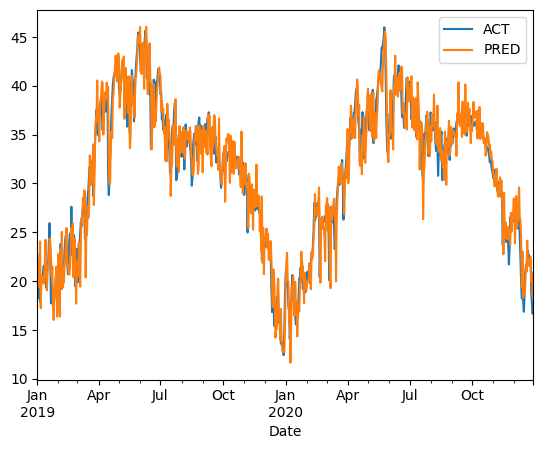

In [178]:
combined.plot()

##Random Forest Regressor

In [179]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=1)

In [180]:
model2.fit(train[predictors], train["target"])

RandomForestRegressor(random_state=1)

In [181]:
pred2=model2.predict(test[predictors])

In [182]:
print("Mean Absolute Error is found to be: %f" %(mean_absolute_error(test["target"], pred2)))
from sklearn.metrics import mean_squared_error

print("MEAN SQUARED ERROR IS = ")
mean_squared_error(test["target"], pred2)

Mean Absolute Error is found to be: 1.302471
MEAN SQUARED ERROR IS = 


2.9833606542051574

In [183]:
combined = pd.concat([test["target"], pd.Series(pred2, index=test.index)], axis=1)
combined.columns = ["ACT", "PRED"]
combined

,ACT,PRED
Date,,
2019-01-01,22.728121,21.850300
2019-01-02,20.498020,22.466192
2019-01-03,18.239582,21.742788
2019-01-04,20.296579,18.758173
2019-01-05,17.874247,21.022580
...,...,...
2020-12-26,22.051994,21.664535
2020-12-27,18.723864,21.297400
2020-12-28,17.541933,19.902777


<Axes: xlabel='Date'>

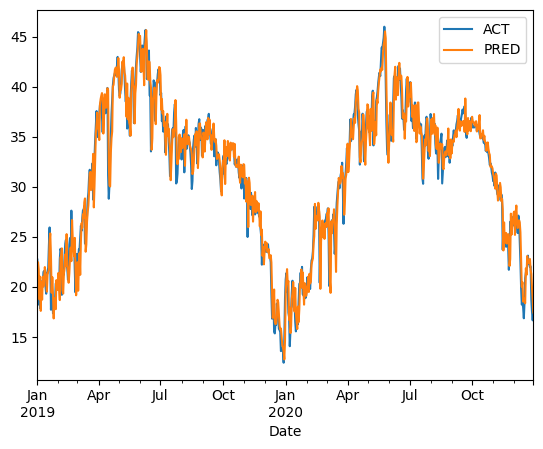

In [184]:
combined.plot()